# Guided Project: Visualising Earnings Based on College Majors

The data investigated in this project is sourced from the American Community Survey and can be found [here][1]. The data set  contains the following information on graduates from colleges between the years 2010-2012:

Column Title | Description of data
:---|---
`Rank`| Rank by median earnings (the dataset is ordered by this column)
`Major_code`|Major code.
`Major`|Major description.
`Major_category`|Category of major.
`Total`|Total number of people with major.
`Sample_size`|Sample size (unweighted) of full-time.
`Men`|Male graduates.
`Women`|Female graduates.
`ShareWomen`|Women as share of total.
`Employed`|Number employed.
`Median`|Median salary of full-time, year-round workers.
`Low_wage_jobs`|Number in low-wage service jobs.
`Full_time`|Number employed 35 hours or more.
`Part_time`|Number employed less than 35 hours.

The aim of the ensuing project is to provide an analysis of this data using newly acquired data visualisation techniques.

The data is first imported as a Pandas DataFrame named `recent_grads`. An overview of the insight into the data contents is given by printing the head and tail of the data.

[1]: https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

pd.set_option('display.max_columns', None)
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0


In [29]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


The data is further explored by using the `DataFrame.descibe()` method to give detail on column contents.

In [30]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We can see that some columns have a count of 173, while other columns have a count of 172. This implies that there are some missing values in the data. Therefore the `DataFrame.dropna()` method is used to eliminate entries containing null values. We can see below that this removes 1 entry.

In [31]:
raw_data_count = recent_grads["Rank"].count()
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads["Rank"].count()

print("Raw Data Entries = ", raw_data_count)
print("Cleaned Data Entries = ", cleaned_data_count)

Raw Data Entries =  173
Cleaned Data Entries =  172


## Initial data visualisation

A select combination of parameters are plotted against each other in the below cell to carry out some initial visual exploration of the data.

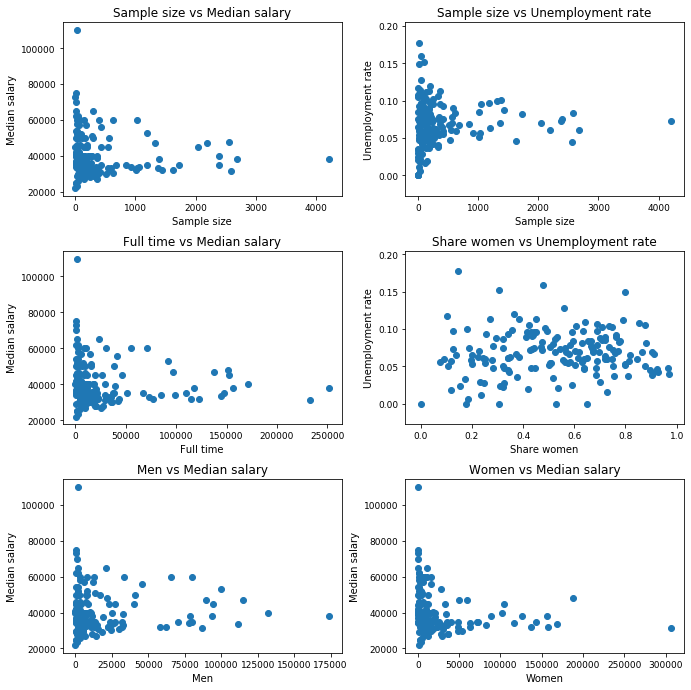

In [77]:
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)

fig, ax = plt.subplots(3, 2, figsize = (10, 10))
fig.tight_layout(pad=3.5)

ax[0, 0].scatter(x = recent_grads["Sample_size"], y = recent_grads["Median"])
ax[0, 1].scatter(x = recent_grads["Sample_size"], y = recent_grads["Unemployment_rate"])
ax[1, 0].scatter(x = recent_grads["Full_time"], y = recent_grads["Median"])
ax[1, 1].scatter(x = recent_grads["ShareWomen"], y = recent_grads["Unemployment_rate"])
ax[2, 0].scatter(x = recent_grads["Men"], y = recent_grads["Median"])
ax[2, 1].scatter(x = recent_grads["Women"], y = recent_grads["Median"])

ax[0, 0].set_title("Sample size vs Median salary")
ax[0, 0].set_xlabel("Sample size")
ax[0, 0].set_ylabel("Median salary")

ax[0, 1].set_title("Sample size vs Unemployment rate")
ax[0, 1].set_xlabel("Sample size")
ax[0, 1].set_ylabel("Unemployment rate")

ax[1, 0].set_title("Full time vs Median salary")
ax[1, 0].set_xlabel("Full time")
ax[1, 0].set_ylabel("Median salary")

ax[1, 1].set_title("Share women vs Unemployment rate")
ax[1, 1].set_xlabel("Share women")
ax[1, 1].set_ylabel("Unemployment rate")

ax[2, 0].set_title("Men vs Median salary")
ax[2, 0].set_xlabel("Men")
ax[2, 0].set_ylabel("Median salary")

ax[2, 1].set_title("Women vs Median salary")
ax[2, 1].set_xlabel("Women")
ax[2, 1].set_ylabel("Median salary")

plt.show()


Altough relatively little analysis can be drawn from the above scatter graphs, the below points are noted:

- Almost all median salaries for each major fall between \\$20,000 and \\$80,000, with only one major giving a median salary of over \\$100,000
- Majors with fewer students (men/women/full time) are more likely to result in a median salary of \\$50,000+
- Majors studied by a high proportion of men are more likely to have a higher median salary (\\$50,000+)
- Unemployment rates are normally distributed about a mean of approximately 7.5%

The following cell dissects a selection of series from the `recent_grads` dataframe by plotting their frequency distributions.

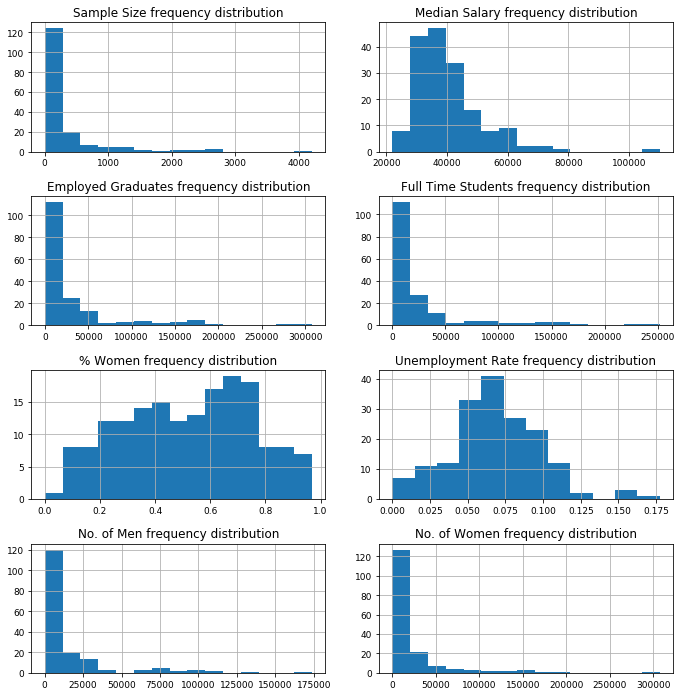

In [110]:
fig, ax = plt.subplots(4, 2, figsize = (10, 10))
fig.tight_layout(pad=2.5)

recent_grads["Sample_size"].hist(bins = 15, ax = ax[0, 0])
recent_grads["Median"].hist(bins = 15, ax = ax[0, 1])
recent_grads["Employed"].hist(bins = 15, ax = ax[1, 0])
recent_grads["Full_time"].hist(bins = 15, ax = ax[1, 1])
recent_grads["ShareWomen"].hist(bins = 15, ax = ax[2, 0])
recent_grads["Unemployment_rate"].hist(bins = 12, ax = ax[2, 1])
recent_grads["Men"].hist(bins = 15, ax = ax[3, 0])
recent_grads["Women"].hist(bins = 15, ax = ax[3, 1])

ax[0, 0].set_title("Sample Size frequency distribution")
ax[0, 1].set_title("Median Salary frequency distribution")
ax[1, 0].set_title("Employed Graduates frequency distribution")
ax[1, 1].set_title("Full Time Students frequency distribution")
ax[2, 0].set_title("% Women frequency distribution")
ax[2, 1].set_title("Unemployment Rate frequency distribution")
ax[3, 0].set_title("No. of Men frequency distribution")
ax[3, 1].set_title("No. of Women frequency distribution")

plt.show()

The following conclusions can be drawn from this visualisation of the data:
- The values from many of the series are highly dependent on the sample size of the particular major in question (i.e. employed graduates, full time students, number of men/women)
- Median salary is positively skewed, with a modal salary of approximately \\$35,000 - \\$40,000
- The percentage of women by major is approximately normally distibuted, with a slight negative skew, meaning the modal percentage of women on a major is >50% (approximately 65-70%). There is also a very large standard deviation for this distribution, with a large number of majors having both very low and very high proportion of women graduates.
- The unemployment rate is normally distributed with a mode of 6-7.5%.

The following cells use the `scatter_matix()` function to investigate the relationship between total number of students graduating in major, percentage of women graduating in major, number of graduates employed full-time upon graduation and the median major earning.

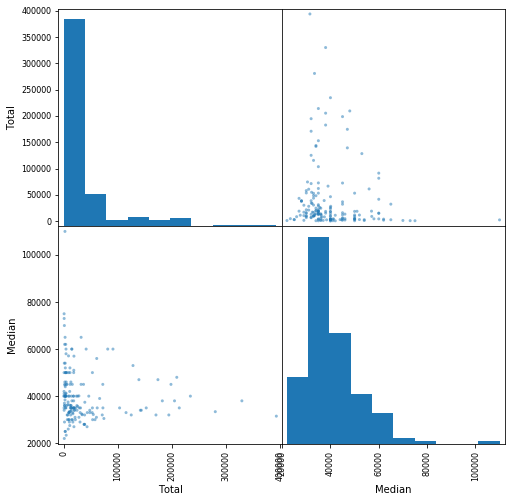

In [130]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Total", "Median"]], figsize = (8, 8))
plt.show()

There is a loose correlation between number of graduates of a given major and the median graduate salary: graduates from the most popular major have a relatively low median salary and the highest salaried majors typically have <100,000 graduates in the explored years.

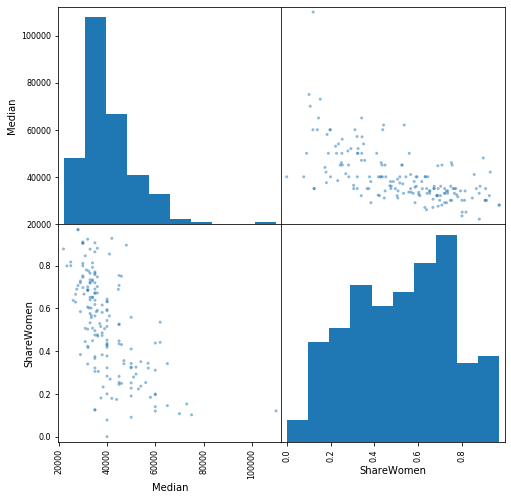

In [127]:
scatter_matrix(recent_grads[["Median", "ShareWomen"]], figsize = (8, 8))
plt.show()

There is a moderate negative linear correlation between the proportion of women graduating in a given major and the median slary of that major: majors with a high percentage of women graduates typically have lower median salaries than majors with a low percentage of women graduates.

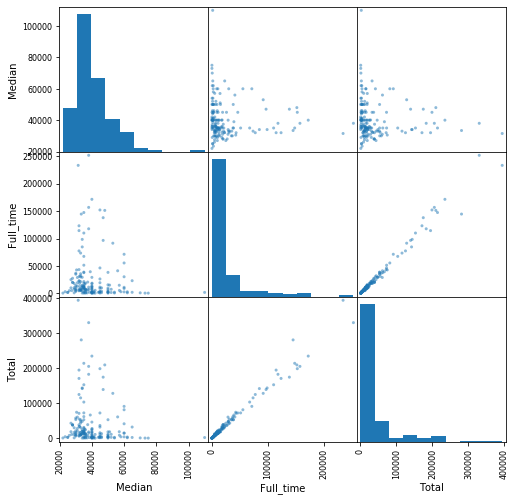

In [133]:
scatter_matrix(recent_grads[["Median", "Full_time", "Total"]], figsize = (8, 8))
plt.show()

This analysis appears to indicate that the `Median` vs `Full_time`  relationship has same loose correlation as `Median` vs `Total`. However, this is because the number of full-time employees from a given major is strongly positively correlated with the total number of graduates from a given major (i.e. because a high number of students graduate from a given major, there are likely to be a high number of these students that go on to be employed full-time in comparison to majors with few students).

Therefore, the `Median` vs `Full_time` relationship is biased towards majors with high number of graduates. A more insightful analysis would see `Median` plotted against the proportion of students from a given major that go on to be employed full-time (i.e. `Full_time` / `Total`)

The cell below gives a further insight to the relationship between ther proportion of female graduates per major and the median salary (`ShareWomen` vs `Median`) by selecting only the top 10 and bottom 10 ranking majors by mean salary.

The cell also compares the unemployment rate by major against the top and bottom ranking majors by salary.

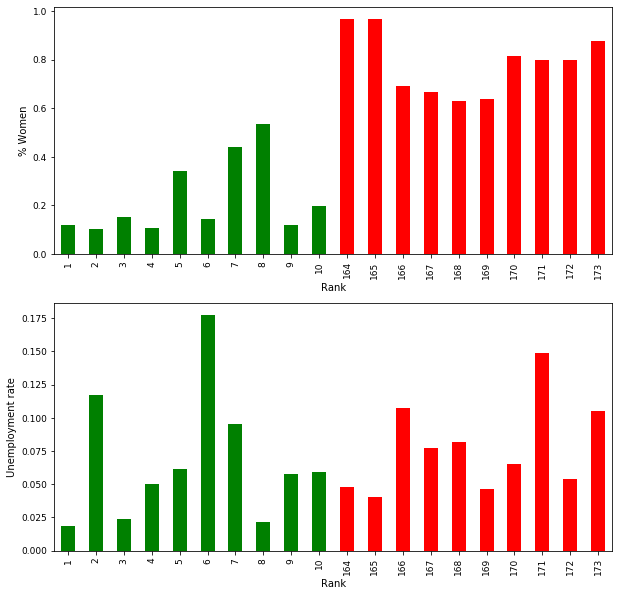

In [228]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))

first_and_last_10 = recent_grads.iloc[np.r_[0:10, -10:0]]

colorkey = ["green", "green", "green", "green", "green", "green", "green", "green", "green", "green", "red", "red", "red", "red", "red", "red", "red", "red", "red", "red"]

first_and_last_10.plot.bar(x='Rank', y='ShareWomen', ax= ax[0], color = colorkey, legend = False)
first_and_last_10.plot.bar(x='Rank', y='Unemployment_rate', ax= ax[1], color=colorkey, legend = False)

ax[0].set_ylabel("% Women")
ax[1].set_ylabel("Unemployment rate")

plt.show()

The analysis clearly shows that the top 10 ranking majors by salary have a very low proportion of women graduates in comparison to the bottom 10 ranking majors, which have a very high proportion of women graduates. This pattern is not present in the unemployment rate across the top and bottom ranking majors by salary.

This suggests that there is not discrimination regarding the employment of women, but that there is discrimination regarding the pay gap between male and female graduates.

An alternative explanation may be that there are fewer female admissions to majors that result in a high salary upon graduation. This may be because there is discrimination within the admissions to these courses or becuase there is a lack of female applicants to these courses.